In [14]:
import pandas as pd
import json
import matplotlib.pyplot as plt
import seaborn as sns

# Load JSON data into a DataFrame
json_file_path = 'sources/files/gps_info.json'
with open(json_file_path, 'r') as json_file:
    json_data = json.load(json_file)

In [15]:
data = []

# Iterate over each key-value pair in the JSON file
for filename, info in json_data.items():
    # Check if 'DateTime' is present in the info dictionary
    if 'DateTime' in info:
        # Check if 'GPSInfo' is present in the info dictionary
        if 'GPSInfo' in info:
            flat_info = {'Filename': filename, 'DateTime': info['DateTime']}
            
            # Include 'GPSInfo' as a single column
            flat_info['GPSInfo'] = info['GPSInfo']

            data.append(flat_info)

# Create DataFrame from the collected data
gps_data = pd.DataFrame(data)

# Convert 'DateTime' to datetime objects with specified format
gps_data['DateTime'] = pd.to_datetime(gps_data['DateTime'], format='%Y:%m:%d %H:%M:%S', errors='coerce')

# Drop rows with missing values
gps_data = gps_data.dropna()
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)

In [16]:
display(gps_data)

,Filename,DateTime,GPSInfo
0,IMG_20200106_130625.jpg,2020-01-06 13:06:25,"{'7': [[10, 1], [6, 1], [21, 1]], '29': '2020:01:06'}"
1,IMG_20210726_140940.jpg,2021-07-26 14:09:39,"{'7': [[11, 1], [9, 1], [34, 1]], '29': '2021:07:26'}"
2,IMG_20210729_124314.jpg,2021-07-29 12:43:14,"{'7': [[9, 1], [43, 1], [9, 1]], '29': '2021:07:29'}"
3,IMG_20220704_231605.jpg,2022-07-04 23:16:05,"{'1': 'N', '2': [[39, 1], [56, 1], [61760, 10000]], '3': 'E', '4': [[32, 1], [51, 1], [409942, 10000]], '5': 0, '6': [941000, 1000], '7': [[20, 1], [15, 1], [50, 1]], '27': 'ASCII   NETWORK', '29': '2022:07:04'}"
4,IMG_20220704_231618.jpg,2022-07-04 23:16:18,"{'1': 'N', '2': [[39, 1], [56, 1], [57746, 10000]], '3': 'E', '4': [[32, 1], [51, 1], [415576, 10000]], '5': 0, '6': [943300, 1000], '7': [[20, 1], [16, 1], [11, 1]], '27': 'ASCII   NETWORK', '29': '2022:07:04'}"
...,...,...,...
2055,IMG_20231025_153412.jpg,2023-10-25 15:34:12,"{'1': 'N', '2': [[40, 1], [53, 1], [286735, 10000]], '3': 'E', '4': [[29, 1], [22, 1], [571958, 10000]], '5': 0, '6': [200599, 1000], '7': [[12, 1], [33, 1], [56, 1]], '27': 'ASCII   NETWORK', '29': '2023:10:25'}"
2056,IMG_20231025_162456.jpg,2023-10-25 16:24:56,"{'1': 'N', '2': [[40, 1], [53, 1], [284391, 10000]], '3': 'E', '4': [[29, 1], [22, 1], [572120, 10000]], '5': 0, '6': [201199, 1000], '7': [[13, 1], [24, 1], [52, 1]], '27': 'ASCII   NETWORK', '29': '2023:10:25'}"
2057,IMG_20231025_162501.jpg,2023-10-25 16:25:01,"{'1': 'N', '2': [[40, 1], [53, 1], [284391, 10000]], '3': 'E', '4': [[29, 1], [22, 1], [572120, 10000]], '5': 0, '6': [201199, 1000], '7': [[13, 1], [24, 1], [52, 1]], '27': 'ASCII   NETWORK', '29': '2023:10:25'}"
2058,IMG_20231025_162501_1.jpg,2023-10-25 16:25:01,"{'1': 'N', '2': [[40, 1], [53, 1], [284391, 10000]], '3': 'E', '4': [[29, 1], [22, 1], [572120, 10000]], '5': 0, '6': [201199, 1000], '7': [[13, 1], [24, 1], [52, 1]], '27': 'ASCII   NETWORK', '29': '2023:10:25'}"


In [1]:
gps_data['DateTime'] = pd.to_datetime(gps_data['DateTime'], format='%Y:%m:%d %H:%M:%S', errors='coerce')

# Drop rows with missing values
gps_data = gps_data.dropna()

# Extract day, month, and year
gps_data['Day'] = gps_data['DateTime'].dt.day
gps_data['Month'] = gps_data['DateTime'].dt.month
gps_data['Year'] = gps_data['DateTime'].dt.year

# Plotting
sns.set(style="whitegrid")
plt.figure(figsize=(15, 6))
# Use the desired column for plotting, for example, 'GPSInfo' represents the entire 'GPSInfo' dictionary
photos_per_day = gps_data.groupby(['Year', 'Month', 'Day'])['GPSInfo'].count()
average_photos_per_day = photos_per_day.mean()

photos_per_day.plot(marker='o', linestyle='-', label='Photos per Day')
plt.axhline(average_photos_per_day, color='r', linestyle='--', label='Average Photos per Day')
plt.title('Photos Taken per Day Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Photos')
plt.legend()
plt.show()
display()

NameError: name 'pd' is not defined

In [18]:
# Count of photos in each location
photos_in_istanbul = 0
photos_in_ankara = 0
photos_in_mugla = 0

for filename, info in json_data.items():
    if 'GPSInfo' in info and '2' in info['GPSInfo'] and '4' in info['GPSInfo']:
        lat_deg, lat_min, lat_sec = info['GPSInfo']['2']
        lon_deg, lon_min, lon_sec = info['GPSInfo']['4']

        # Check if the latitude and longitude information is present
        if lat_deg and lon_deg:
            # Convert degrees, minutes, seconds to decimal degrees
            lat = lat_deg[0] + lat_min[0] / 60.0 + lat_sec[0] / lat_sec[1] / 3600.0
            lon = lon_deg[0] + lon_min[0] / 60.0 + lon_sec[0] / lon_sec[1] / 3600.0

            # Adjust coordinates based on direction (N/S, E/W)
            if info['GPSInfo']['1'] == 'S':
                lat = -lat
            if info['GPSInfo']['3'] == 'W':
                lon = -lon

            # Check if the photo is in Istanbul
            if 40.8 <= lat <= 41.3 and 28.4 <= lon <= 30.2:
                photos_in_istanbul += 1

            # Check if the photo is in Ankara
            elif 39.7 <= lat <= 40.2 and 32.6 <= lon <= 33.1:
                photos_in_ankara += 1

            # Check if the photo is in Muğla
            elif 36.3 <= lat <= 37.5 and 27.0 <= lon <= 29.5:
                photos_in_mugla += 1

# Print the results
print(f"Number of photos taken in Istanbul: {photos_in_istanbul}")
print(f"Number of photos taken in Ankara: {photos_in_ankara}")
print(f"Number of photos taken in Muğla: {photos_in_mugla}")

Number of photos taken in Istanbul: 1706
Number of photos taken in Ankara: 48
Number of photos taken in Muğla: 77


In [19]:
# Count the number of photos for each date
photo_counts = gps_data.groupby(['Year', 'Month', 'Day']).size().reset_index(name='NumPhotos')

# Filter dates with more than 30 photos
high_photo_dates = photo_counts[photo_counts['NumPhotos'] > 30]

# Display the dates with over 30 photos
print(high_photo_dates.to_string(index=False))

 Year  Month  Day  NumPhotos
 2022      8    8         33
 2022     10   12         49
 2022     11   19         53
 2023      4   28         35
 2023      8   14         38
 2023      9   27         37


In [20]:
from geopy.distance import geodesic

# Function to calculate distance using Haversine formula
def haversine_distance(coord1, coord2):
    return geodesic(coord1, coord2).km

# Define the location of Yeditepe University
yeditepe_coords = (40.975883912344294, 29.15217540960381)

# Extract latitude and longitude from 'GPSInfo' column
gps_data['Latitude'] = gps_data['GPSInfo'].apply(lambda x: x.get('7', [[0, 0], [0, 0], [0, 0]])[0][0] if isinstance(x, dict) else 0)
gps_data['Longitude'] = gps_data['GPSInfo'].apply(lambda x: x.get('7', [[0, 0], [0, 0], [0, 0]])[1][0] if isinstance(x, dict) else 0)

# Recalculate the distance to Yeditepe University
gps_data['Distance_to_Yeditepe'] = gps_data.apply(lambda row: ((row['Latitude'] - yeditepe_coords[0])**2 + (row['Longitude'] - yeditepe_coords[1])**2)**0.5, axis=1)

# Filter photos close to Yeditepe University
photos_near_yeditepe = gps_data[gps_data['Distance_to_Yeditepe'] < 22.5]

# Print the results
print(f"Number of photos taken close to Yeditepe University: {len(photos_near_yeditepe)}")

# Define the location of Sabancı University
sabanci_coords = (40.89126917789958, 29.378318763258005)

# Extract latitude and longitude from 'GPSInfo' column
gps_data['Latitude_Sabanci'] = gps_data['GPSInfo'].apply(lambda x: x.get('7', [[0, 0], [0, 0], [0, 0]])[0][0] if isinstance(x, dict) else 0)
gps_data['Longitude_Sabanci'] = gps_data['GPSInfo'].apply(lambda x: x.get('7', [[0, 0], [0, 0], [0, 0]])[1][0] if isinstance(x, dict) else 0)

# Recalculate the distance to Sabancı University
gps_data['Distance_to_Sabanci'] = gps_data.apply(lambda row: ((row['Latitude_Sabanci'] - sabanci_coords[0])**2 + (row['Longitude_Sabanci'] - sabanci_coords[1])**2)**0.5, axis=1)

# Filter photos close to Sabancı University
photos_near_sabanci = gps_data[gps_data['Distance_to_Sabanci'] < 26.5]

# Print the results
print(f"Number of photos taken close to Sabancı University: {len(photos_near_sabanci)}")

# Define the location of your home
home_coords = (40.89920301192123, 29.17745313241991)

# Extract latitude and longitude from 'GPSInfo' column for your home
gps_data['Latitude_Home'] = gps_data['GPSInfo'].apply(lambda x: x.get('7', [[0, 0], [0, 0], [0, 0]])[0][0] if isinstance(x, dict) else 0)
gps_data['Longitude_Home'] = gps_data['GPSInfo'].apply(lambda x: x.get('7', [[0, 0], [0, 0], [0, 0]])[1][0] if isinstance(x, dict) else 0)

# Recalculate the distance to your home
gps_data['Distance_to_Home'] = gps_data.apply(lambda row: ((row['Latitude_Home'] - home_coords[0])**2 + (row['Longitude_Home'] - home_coords[1])**2)**0.5, axis=1)

# Filter photos close to your home
photos_near_home = gps_data[gps_data['Distance_to_Home'] < 28]  # Adjust the distance threshold as needed

# Print the results
print(f"Number of photos taken close to your home: {len(photos_near_home)}")

Number of photos taken close to Yeditepe University: 152
Number of photos taken close to Sabancı University: 415
Number of photos taken close to your home: 563


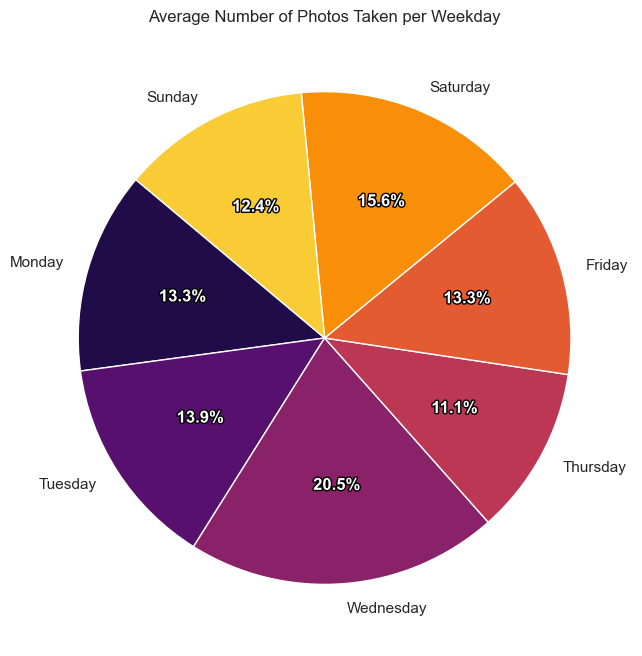

In [21]:
import calendar
from matplotlib.patheffects import withStroke

# Set Seaborn style and color palette
sns.set(style="whitegrid")
sns.set_palette("inferno", 7)


# Group by weekday and calculate the average number of photos
average_photos_per_weekday = gps_data.groupby(gps_data['DateTime'].dt.weekday)['GPSInfo'].count().mean()

# Count the number of photos per weekday
photos_per_weekday = gps_data.groupby(gps_data['DateTime'].dt.weekday)['GPSInfo'].count()

# Map weekday numerical values to their names
weekday_names = [calendar.day_name[i] for i in range(7)]

# Plotting a pie chart with custom text color
plt.figure(figsize=(8, 8))
pie = plt.pie(photos_per_weekday, labels=weekday_names, autopct='%1.1f%%', startangle=140)

# Customize text color
for text in pie[2]:
    text.set_color('white')
    text.set_fontsize(12)
    text.set_fontweight('bold')
    text.set_path_effects([withStroke(linewidth=2, foreground='black')])

plt.title('Average Number of Photos Taken per Weekday')
plt.show()

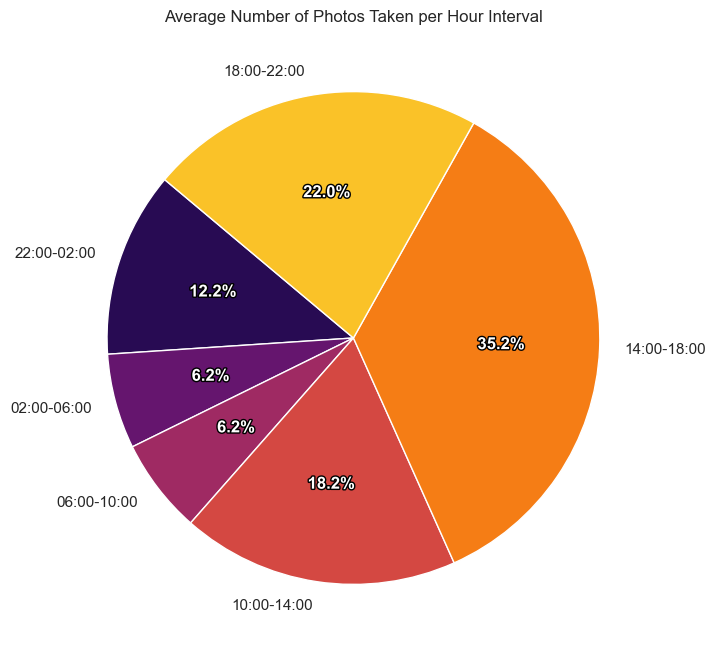

In [22]:
import calendar
import warnings
from matplotlib.patheffects import withStroke

# Suppress FutureWarnings
warnings.filterwarnings("ignore", category=FutureWarning)

# Define time intervals
time_intervals = [(0, 2), (2, 6), (6, 10), (10, 14), (14, 18), (18, 22), (22, 24)]

# Create a new column 'HourInterval' based on the time intervals
gps_data['Hour'] = gps_data['DateTime'].dt.hour
gps_data['HourInterval'] = pd.cut(gps_data['Hour'], bins=[interval[0] for interval in time_intervals], labels=['00-02', '02-06', '06-10', '10-14', '14-18', '18-22'], include_lowest=True)

# Set Seaborn style and color palette
sns.set(style="whitegrid", palette="inferno")

# Group by hour interval and calculate the average number of photos
average_photos_per_hour_interval = gps_data.groupby('HourInterval')['GPSInfo'].count().mean()

# Count the number of photos per hour interval
photos_per_hour_interval = gps_data.groupby('HourInterval')['GPSInfo'].count()

# Map hour intervals to their names
hour_interval_names = ['22:00-02:00', '02:00-06:00', '06:00-10:00', '10:00-14:00', '14:00-18:00', '18:00-22:00']

# Plotting a pie chart with custom text color
plt.figure(figsize=(8, 8))
pie = plt.pie(photos_per_hour_interval, labels=hour_interval_names, autopct='%1.1f%%', startangle=140)

# Customize text color
for text in pie[2]:
    text.set_color('white')
    text.set_fontsize(12)
    text.set_fontweight('bold')
    text.set_path_effects([withStroke(linewidth=2, foreground='black')])

plt.title('Average Number of Photos Taken per Hour Interval')
plt.show()

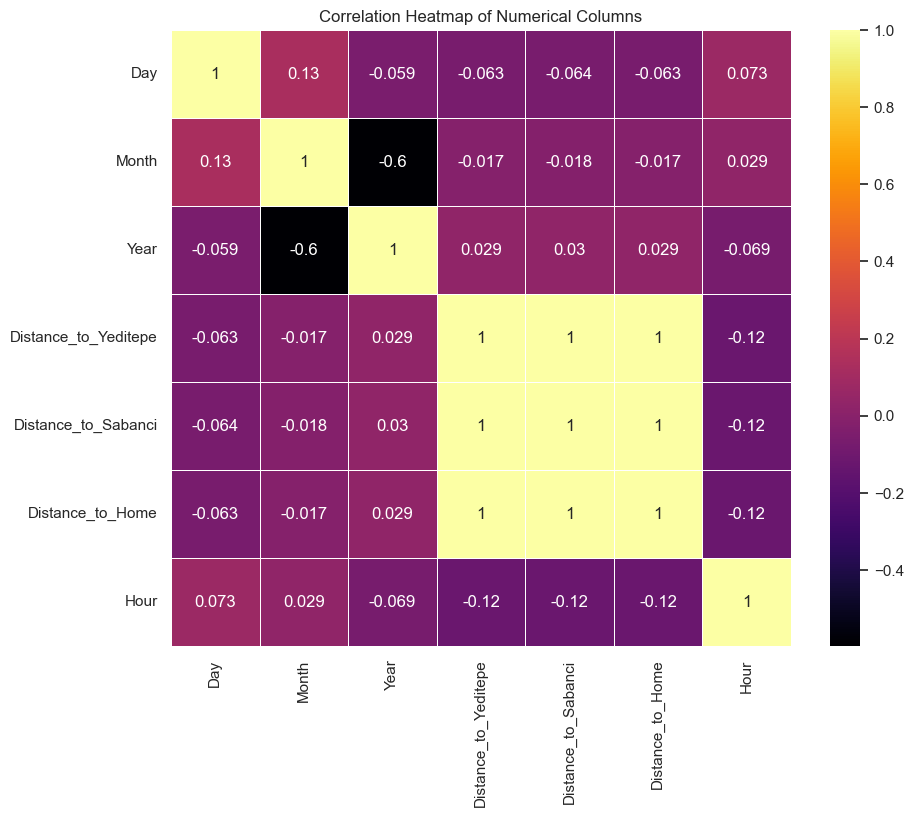

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select numerical columns only
columns_to_remove = ["Latitude", "Longitude", "Latitude_Sabanci", "Longitude_Sabanci", "Latitude_Home", "Longitude_Home"]
gps_data.drop(columns=columns_to_remove, inplace=True)

numerical_columns = gps_data.select_dtypes(include=['number'])

# Calculate the correlation matrix
correlation_matrix = numerical_columns.corr()

# Set Seaborn style and color palette
sns.set(style="white")
sns.set_palette("inferno")

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="inferno", linewidths=.5)
plt.title('Correlation Heatmap of Numerical Columns')
plt.show()

DatetimeIndex(['2023-10-25', '2023-08-15', '2023-09-01', '2023-09-15',
               '2023-10-01', '2023-10-15', '2023-11-01', '2023-11-15'],
              dtype='datetime64[ns]', freq=None)


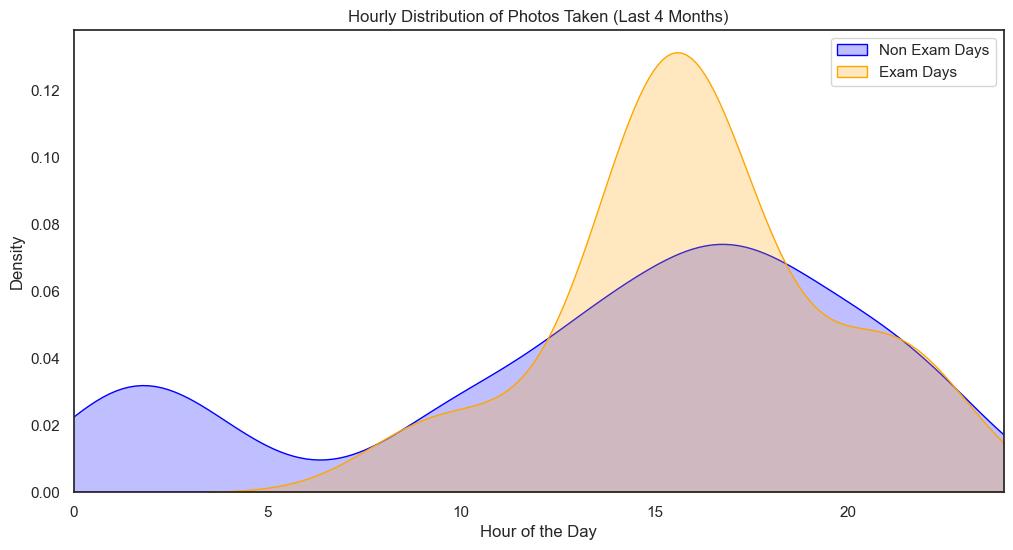

In [24]:
# Assuming 'exam_dates_list' is a list of exam dates in the format 'mm dd'
exam_dates_list = ['10 25', '08 15', '09 01', '09 15', '10 01', '10 15', '11 01', '11 15']

# Convert exam dates to datetime format
exam_dates = pd.to_datetime(['2023 ' + date for date in exam_dates_list], format='%Y %m %d')
print(exam_dates)

# Assuming you have a DataFrame named 'gps_data'
# Replace 'your_exam_dates_column' with the actual column name

# Step 1: Ensure 'Date' column is in datetime format
gps_data['Date'] = pd.to_datetime(gps_data['DateTime'].dt.date)

# Step 2: Extract hour information
gps_data['Hour'] = gps_data['DateTime'].dt.hour

# Step 3: Create a new column indicating whether the date corresponds to an exam date
gps_data['IsExamDate'] = gps_data['Date'].isin(exam_dates)

# Filter data for the last 4 months
last_4_months_data = gps_data[gps_data['DateTime'] >= gps_data['DateTime'].max() - pd.DateOffset(months=4)]

# Step 4: Plot histogram with two sides
plt.figure(figsize=(12, 6))

sns.kdeplot(last_4_months_data[last_4_months_data['IsExamDate'] == False]['Hour'], color='blue', label='Non Exam Days', fill=True)
sns.kdeplot(last_4_months_data[last_4_months_data['IsExamDate'] == True]['Hour'], color='orange', label='Exam Days', fill=True)

plt.xlabel('Hour of the Day')
plt.ylabel('Density')
plt.title('Hourly Distribution of Photos Taken (Last 4 Months)')
plt.legend()

# Set x-axis limits to the actual range of hours
plt.xlim(0, 24)

plt.show()

In [27]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

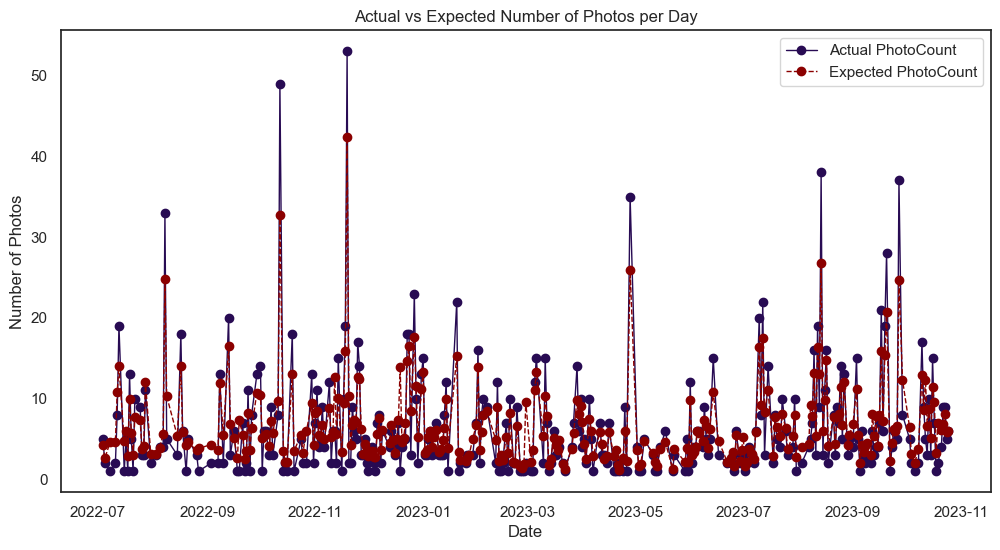

In [60]:
# Assuming 'data' is your DataFrame
# Convert 'DateTime' column to datetime format
new_gps_data = pd.DataFrame(data)

new_gps_data['DateTime'] = pd.to_datetime(new_gps_data['DateTime'], format='%Y:%m:%d %H:%M:%S')

# Extract features from 'DateTime'
new_gps_data['Year'] = new_gps_data['DateTime'].dt.year
new_gps_data['Month'] = new_gps_data['DateTime'].dt.month
new_gps_data['Day'] = new_gps_data['DateTime'].dt.day

# Count the number of photos for each date
actual_photo_count = new_gps_data.groupby(['Year', 'Month', 'Day']).size().reset_index(name='ActualPhotoCount')

# Extract features from 'GPSInfo' if needed and include them in X
# For simplicity, I'm using only 'Year', 'Month', 'Day' as features
X = new_gps_data[['Year', 'Month', 'Day']].drop_duplicates()

# Train a model (Random Forest Regressor as an example)
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X, actual_photo_count['ActualPhotoCount'])

# Predict expected PhotoCount for the entire dataset
expected_photo_count = pd.Series(model.predict(X), name='ExpectedPhotoCount')

# Merge actual and expected counts based on the date
result['Date'] = pd.to_datetime(result[['Year', 'Month', 'Day']])
result = result[result['Date'] >= '2022-07-01'].sort_values(by='Date')

# Plot the actual and expected numbers
plt.figure(figsize=(12, 6))
plt.plot(result['Date'], result['ActualPhotoCount'], label='Actual PhotoCount', marker='o', linewidth=1)
plt.plot(result['Date'], result['ExpectedPhotoCount'], label='Expected PhotoCount', linestyle='--', marker='o', color="darkred", linewidth=1)
plt.xlabel('Date')
plt.ylabel('Number of Photos')
plt.title('Actual vs Expected Number of Photos per Day')
plt.legend()
plt.show()